# Task 6: Prediction using Decision Tree Algorithm
## To create a decision tree classifier and visualise it graphically
By Manish Kumar
## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Load the Iris Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df=df.drop(['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


## Turning non-numerical data column to numerical
Since, Species column is of object datatype, it can be converted into numeric using LabelEncoder

In [4]:
le=LabelEncoder()
df.Species=le.fit_transform(df["Species"])
print(le.classes_)
print(len(le.classes_))
df

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Dividing our data into test and train sets
Let's divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X=df.iloc[:,:-1]
Y=df['Species']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

## Training our model

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


We can check the accuracy of our model using test set.

In [7]:
y_pred = dtree.predict(X_test)
dtree.score(X_test,Y_test)

0.9

The accuracy of our model is 90%
Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,Y_test)
print(cm)

[[ 8  0  0]
 [ 0  9  1]
 [ 0  2 10]]


## We can visualize the Decision Tree to understand it better.

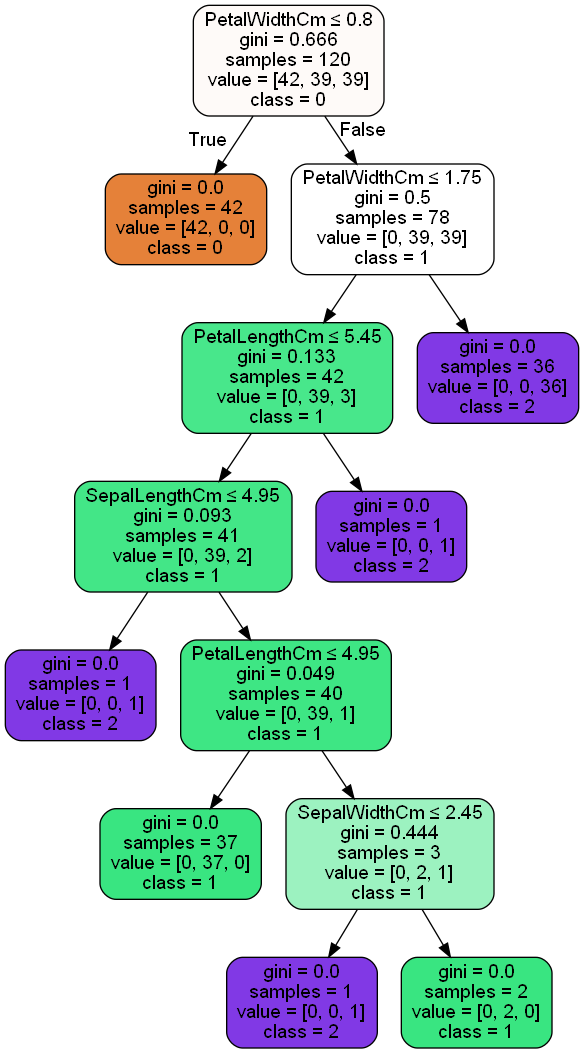

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,
                feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
               special_characters=True,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

This is the decision tree of the trained model.